In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Colab Datasets/movies.csv')

This dataset is pulled from https://www.kaggle.com/datasets/abdallahwagih/movies

The questions I want to answer through this data exploration are:


*   Does the budget of the movie have an impact on revenue?
*   Does the budget of the movie have an impact on the average voting score?
*   Does the runtime of the movie have an impact on revenue?
*   Does the runtime of the movie have an impact on the average voting score?

My hypotheses are:


*   Null Hypothesis: A higher budget does not change the movie’s revenue. Alternative Hypothesis: A higher budget indicates that the movie will have a higher revenue.
*   Null Hypothesis: A higher budget does not change the movie’s average voting score. Alternative Hypothesis: A higher budget indicates that the movie will have a higher average voting score.
*   Null Hypothesis: A higher runtime does not change the movie’s revenue. Alternative Hypothesis: A higher runtime decreases the movie’s revenue.
*   Null Hypothesis: A higher runtime does not change the movie’s average voting score. Alternative Hypothesis: A higher runtime indicates that the movie’s average voting score will be lower.





There are 4803 rows in the dataset and these are the columns in the original dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

These are the columns that I am dropping as I will not be using them in my analyses. I will be using the budget, revenue, runtime, and vote_average columns from the original data. These columns all contain continuous integer data.

In [ ]:
columns_to_drop = [col for col in ['index', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'status', 'release_date', 'spoken_languages', 'tagline', 'title', 'vote_count', 'cast', 'crew', 'director'] if col in df.columns]
df_changed = df.drop(columns_to_drop, axis=1)
df_changed.columns

Index(['budget', 'revenue', 'runtime', 'vote_average'], dtype='object')

In [ ]:
df_changed.isnull().sum()

budget          0
revenue         0
runtime         2
vote_average    0
dtype: int64

Below I am dropping the null values from the data as there are only 2 null values in the dataset and this will have minimal impact to the analyses

In [ ]:
df_changed_cleaned = df_changed.dropna()
df_changed_cleaned.isnull().sum()

budget          0
revenue         0
runtime         0
vote_average    0
dtype: int64

In [ ]:
df_changed_cleaned.describe().round()

,budget,revenue,runtime,vote_average
count,4801.0,4.801000e+03,4801.0,4801.0
mean,29054015.0,8.229491e+07,107.0,6.0
std,40728211.0,1.628824e+08,23.0,1.0
min,0.0,0.000000e+00,0.0,0.0
25%,800000.0,0.000000e+00,94.0,6.0
50%,15000000.0,1.917997e+07,103.0,6.0
75%,40000000.0,9.292120e+07,118.0,7.0
max,380000000.0,2.787965e+09,338.0,10.0


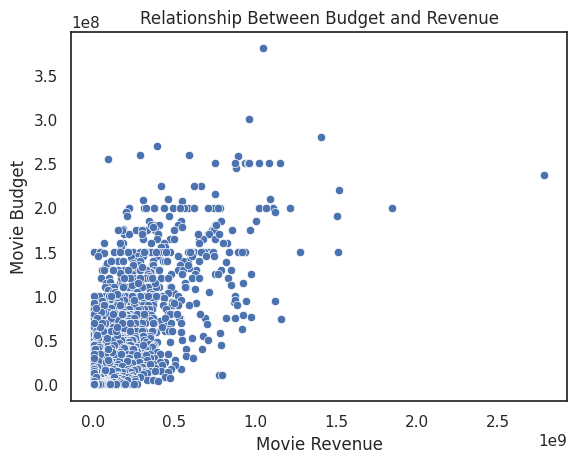

In [ ]:
sns.set_style("white")
sns.scatterplot(x='revenue', y='budget', data=df_changed_cleaned)
plt.xlabel('Movie Revenue')
plt.ylabel('Movie Budget')
plt.title('Relationship Between Budget and Revenue')
plt.show()

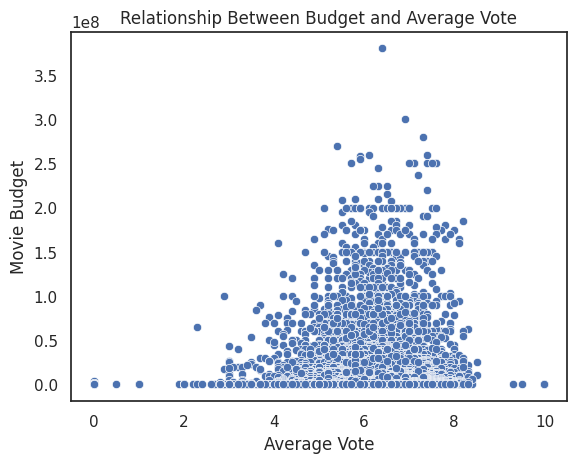

In [ ]:
sns.scatterplot(x='vote_average', y='budget', data=df_changed_cleaned)
plt.xlabel('Average Vote')
plt.ylabel('Movie Budget')
plt.title('Relationship Between Budget and Average Vote')
plt.show()

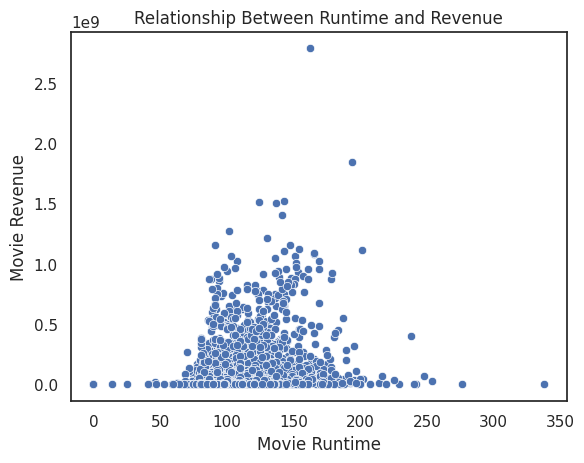

In [ ]:
sns.scatterplot(x='runtime', y='revenue', data=df_changed_cleaned)
plt.xlabel('Movie Runtime')
plt.ylabel('Movie Revenue')
plt.title('Relationship Between Runtime and Revenue')
plt.show()

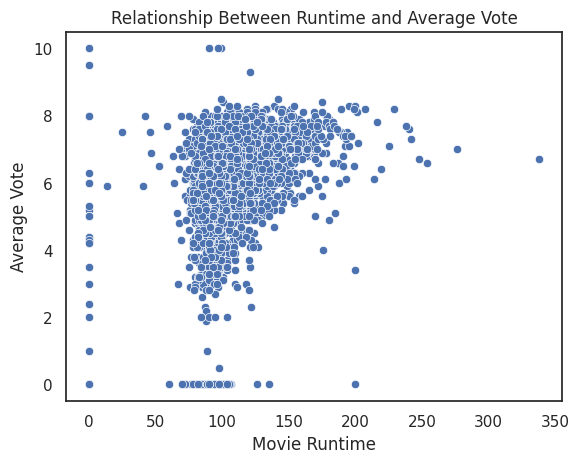

In [ ]:
sns.scatterplot(x='runtime', y='vote_average', data=df_changed_cleaned)
plt.xlabel('Movie Runtime')
plt.ylabel('Average Vote')
plt.title('Relationship Between Runtime and Average Vote')
plt.show()

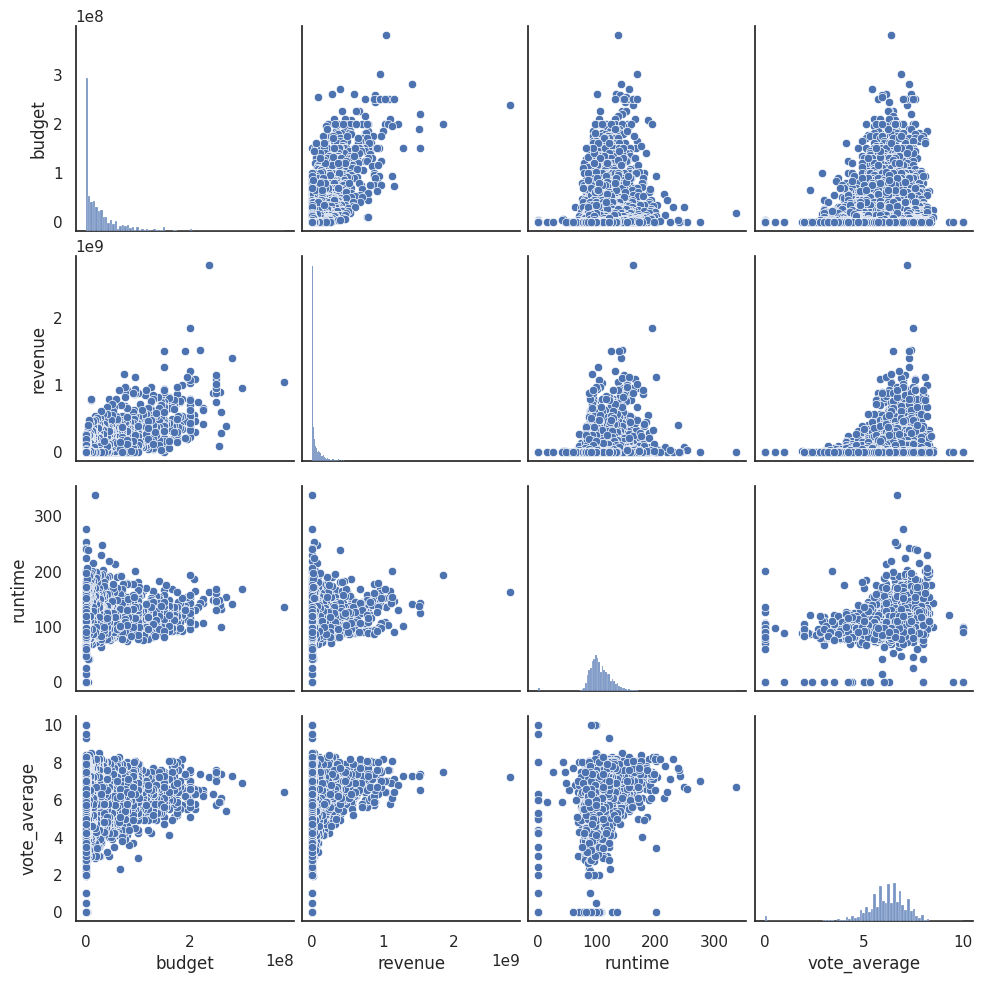

In [ ]:
sns.pairplot(df_changed_cleaned)

In [ ]:
df_changed_cleaned.corr()

,budget,revenue,runtime,vote_average
budget,1.000000,0.730798,0.269851,0.092728
revenue,0.730798,1.000000,0.251093,0.197286
runtime,0.269851,0.251093,1.000000,0.375046
vote_average,0.092728,0.197286,0.375046,1.000000


Here are the correlations between each of the columns, but I am specifically interested in the correlations between budget and revenue, budget and vote_average, runtime and revenue, and runtime and vote_average.

In [ ]:
br = stats.pearsonr(df_changed_cleaned['budget'], df_changed_cleaned['revenue'])
print('This is the statistical significance of correlation for budget and revenue', br)
bv = stats.pearsonr(df_changed_cleaned['budget'], df_changed_cleaned['vote_average'])
print('This is the statistical significance of correlation for budget and vote_average', bv)
rr = stats.pearsonr(df_changed_cleaned['runtime'], df_changed_cleaned['revenue'])
print('This is the statistical significance of correlation for runtime and revenue', rr)
rv = stats.pearsonr(df_changed_cleaned['runtime'], df_changed_cleaned['vote_average'])
print('This is the statistical significance of correlation for runtime and vote_average', rv)

This is the statistical significance of correlation for budget and revenue PearsonRResult(statistic=0.7307981310694912, pvalue=0.0)
This is the statistical significance of correlation for budget and vote_average PearsonRResult(statistic=0.09272813180181597, pvalue=1.216475599376988e-10)
This is the statistical significance of correlation for runtime and revenue PearsonRResult(statistic=0.251093136211557, pvalue=6.254609429225959e-70)
This is the statistical significance of correlation for runtime and vote_average PearsonRResult(statistic=0.3750456803651879, pvalue=3.285375650468046e-160)


There is a strong positive correlation (0.73) between budget and revenue. The p-value being close to zero suggests that this correlation is statistically significant, indicating that the correlation observed is unlikely to be due to random chance.

There is a weak positive correlation (0.09) between budget and vote average. However, the p-value being very small suggests that this correlation is statistically significant, indicating that the correlation observed is unlikely to be due to random chance.

There is a moderate positive correlation (0.25) between runtime and revenue. The small p-value indicates that this correlation is statistically significant.

There is a strong positive correlation (0.375) between runtime and vote average. The very small p-value indicates that this correlation is highly statistically significant.

These hypotheses were supported by my findings here:

*   A higher budget indicates that the movie will have a higher revenue. This was shown to have a strong correlation that is unlikely due to random chance.
*   A higher budget indicates that the movie will have a higher average voting score. This was shown to have a weak correlation, but still positive and this was also unlikely due to random chance.

These hypotheses were not supported by my findings here
*   A higher runtime decreases the movie’s revenue. The analyses showed that there was a moderate positive correlation showing that a higher runtime is likely to increase revenue and that this is not due to random chance.
*   A higher runtime indicates that the movie’s average voting score will be lower. The analyses showed that there was a strong positive correlation showing that a higher runtime is likely to increase the average vote and that this is not due to random chance.

Recommendation number one: Increase budget to be able to increase the revenue that you can earn.
Recommendation number two: Increase the movie's runtime to be able to increase both revenue and the average score by voters.